In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Splitting the dataset into test set and training set
from sklearn.model_selection import train_test_split


# Feature Scaling- In practice it's seen that algos converge much faster if data is scaled properly

# standardization Scaling = (x- min(x))/ sd
# Normalization Scaling = (x- min(x))/ max(x) - min(x)

from sklearn.preprocessing import  StandardScaler


dataset = pd.read_csv('Position_Salaries.csv')

print dataset
# last column not included
X = dataset.iloc[:,1:2].values

# last column value ie output
Y = dataset.iloc[:,2].values


# dataset is small so no need to split otherwise training will not be good
"""
# random state is just for sake of course
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)"""

# no need to scale the data as LinearRegression Library does it on it's own.

# Pretty printing of np arrays
np.set_printoptions(suppress=True)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [75]:
# Fitting linear regression model to our data

from sklearn.linear_model import LinearRegression

linRegressor = LinearRegression()
linRegressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
# Fitting polynomial regression model to our data

from sklearn.preprocessing import PolynomialFeatures

polyRegressor = PolynomialFeatures(degree = 2)
X_poly = polyRegressor.fit_transform(X)

# helps us to see what polyRegressor had done basically.
# 1st column is x0 ie col of ones
# 2nd col is X as it is
# 3rd col is X**2
print X
print "_"*40
print X_poly

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
________________________________________
[[   1.    1.    1.]
 [   1.    2.    4.]
 [   1.    3.    9.]
 [   1.    4.   16.]
 [   1.    5.   25.]
 [   1.    6.   36.]
 [   1.    7.   49.]
 [   1.    8.   64.]
 [   1.    9.   81.]
 [   1.   10.  100.]]


In [77]:
# Traing a model on this newly transformed data
polyReg = LinearRegression()
polyReg.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

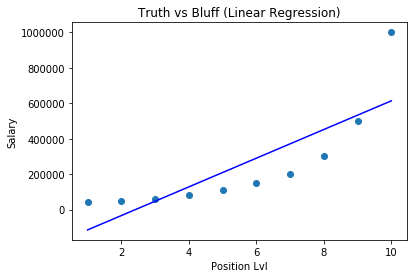

In [78]:
#  Visualising the LinearRegression results

plt.figure(0)
plt.scatter(X,Y)
plt.plot(X,linRegressor.predict(X),'b')
plt.xlabel("Position Lvl")
plt.ylabel("Salary")
plt.title("Truth vs Bluff (Linear Regression)")
plt.show()

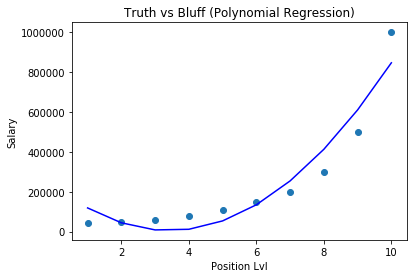

In [79]:
#  Visualising the PolynomialRegression results for degree 2

plt.figure(0)
plt.scatter(X,Y)
plt.plot(X,polyReg.predict(polyRegressor.fit_transform(X)),'b')
plt.xlabel("Position Lvl")
plt.ylabel("Salary")
plt.title("Truth vs Bluff (Polynomial Regression)")
plt.show()

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
________________________________________
[[    1.     1.     1.     1.]
 [    1.     2.     4.     8.]
 [    1.     3.     9.    27.]
 [    1.     4.    16.    64.]
 [    1.     5.    25.   125.]
 [    1.     6.    36.   216.]
 [    1.     7.    49.   343.]
 [    1.     8.    64.   512.]
 [    1.     9.    81.   729.]
 [    1.    10.   100.  1000.]]


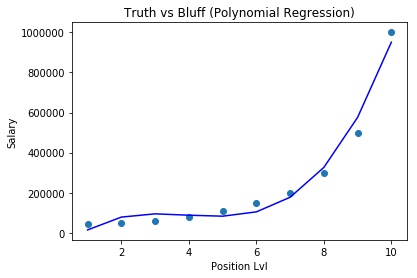

In [80]:
# same with degree 3
# just change this value 3 to observe effect of change of degree
polyRegressor2 = PolynomialFeatures(degree = 3)
X_poly2 = polyRegressor2.fit_transform(X)

# helps us to see what polyRegressor had done basically.
# 1st column is x0 ie col of ones
# 2nd col is X as it is
# 3rd col is X**2
# 4th col is X**3
print X
print "_"*40
print X_poly2

polyRegModel = LinearRegression()
polyRegModel.fit(X_poly2,Y)

plt.figure(0)
plt.scatter(X,Y)
plt.plot(X,polyRegModel.predict(polyRegressor2.fit_transform(X)),'b')
plt.xlabel("Position Lvl")
plt.ylabel("Salary")
plt.title("Truth vs Bluff (Polynomial Regression)")
plt.show()

In [81]:
# Predicting a new result with linear regression

print linRegressor.predict(6.5)

[ 330378.78787879]


In [82]:
# Predicting a new result with polynomial regression

# polynomial regression with degree 2
print polyReg.predict(polyRegressor.fit_transform(6.5))

# polynomial regression with degree 3
print polyRegModel.predict(polyRegressor2.fit_transform(6.5))

[ 189498.10606061]
[ 133259.46969698]
